In [34]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

import utide

print(utide.__version__)
from matplotlib import rcParams
from matplotlib import rc

0.2.5


In [35]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300

In [2]:
import numpy as np

def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [24]:
data = np.genfromtxt('filtered_total_data_non_h.csv', delimiter=",")
time = data[:,0]/24
obs = data[:,1]
anomaly = obs - np.nanmean(obs)

# linerairly interpolate missing values
# nans, x = nan_helper(anomaly)
# anomaly[nans]= np.interp(x(nans), x(~nans), anomaly[~nans])

In [25]:
coef = utide.solve(time, anomaly,
                   lat=50.7818,
                   method='IRLS',
                   conf_int='MC')

solve: matrix prep ... solution ... diagnostics ... done.


In [26]:
tide = utide.reconstruct(time, coef)

prep/calcs ... done.


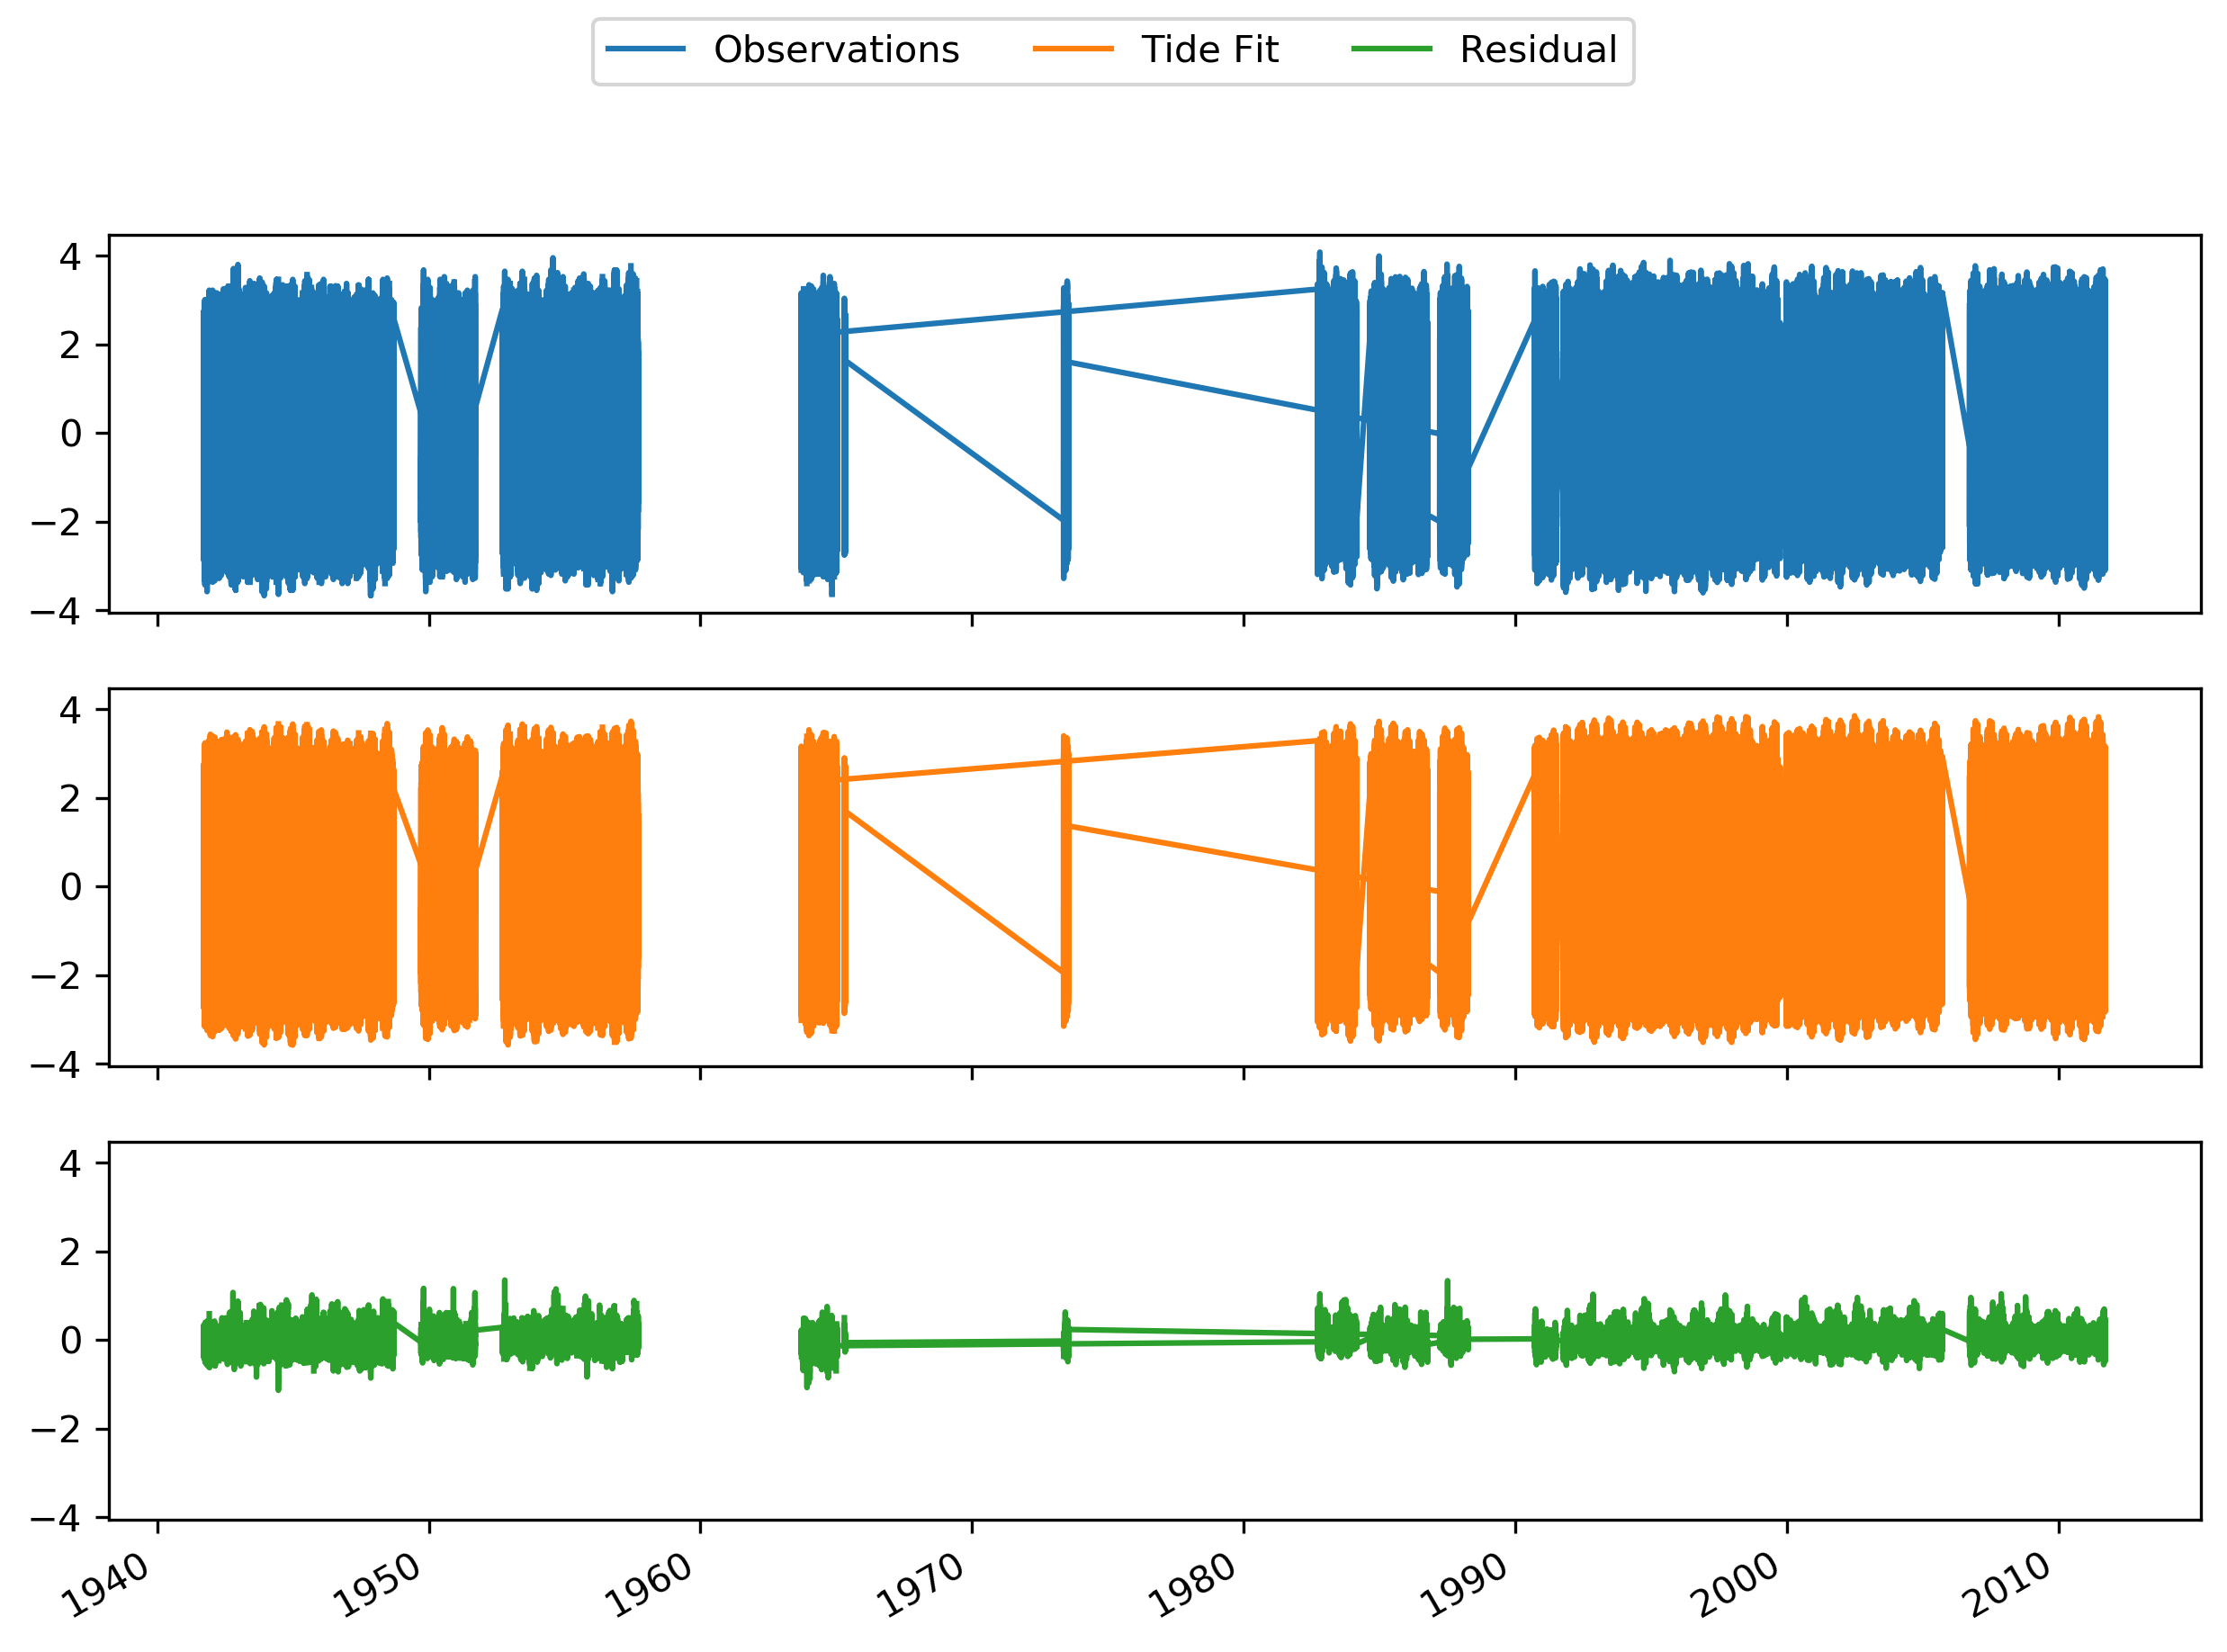

In [37]:
#t = obs.index.values  # dtype is '<M8[ns]' (numpy datetime64)
# It is more efficient to supply the time directly as matplotlib
# datenum floats:
t = tide.t_mpl

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True,figsize=[10,7])

ax0.plot(t, anomaly, label=u'Observations', color='C0')
ax1.plot(t, tide.h, label=u'Tide Fit', color='C1')
ax2.plot(t, anomaly - tide.h, label=u'Residual', color='C2')
ax2.xaxis_date()
fig.legend(ncol=3, loc='upper center')
fig.autofmt_xdate()

In [108]:
from operator import itemgetter

A = np.zeros([len(anomaly - tide.h),2])
A[:,0] = t
A[:,1] = anomaly - tide.h

# for i in range(len(A)):
#     A[i,:] = sorted(A, key=itemgetter(0))[i]

temp = A.view(np.ndarray)
np.lexsort((temp[:, 0], ))
A = temp[np.lexsort((temp[:, 0], ))]
np.savetxt('surge_estimation.csv',A[A[:,0] < np.inf],delimiter=',')

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


In [52]:
for i in range(len(coef.name)):
    print(coef.name[i], 'amplitude:',coef.A[i])

M2 amplitude: 2.247370297323797
S2 amplitude: 0.7293859433113103
N2 amplitude: 0.42501312368185257
K2 amplitude: 0.20866083131285337
L2 amplitude: 0.11128225730127234
NU2 amplitude: 0.09187191690928294
M4 amplitude: 0.08850789706003341
K1 amplitude: 0.075033840162096
MU2 amplitude: 0.06831804655932908
SA amplitude: 0.05979969635710073
MS4 amplitude: 0.056060727075297634
LDA2 amplitude: 0.05567682187135824
2N2 amplitude: 0.05346805847788928
T2 amplitude: 0.04291623779703887
MSN2 amplitude: 0.03503831412969514
MN4 amplitude: 0.031181072715424543
P1 amplitude: 0.027395448636245694
2MS6 amplitude: 0.023250067445455474
M6 amplitude: 0.022073909706599656
EPS2 amplitude: 0.018089050891287813
SSA amplitude: 0.017155766982292354
MK4 amplitude: 0.016214237782270546
MSF amplitude: 0.015344017265366515
MK3 amplitude: 0.01456651704621644
H1 amplitude: 0.014059040263067108
MKS2 amplitude: 0.01391837086944542
M8 amplitude: 0.011370395666370168
2MN6 amplitude: 0.011190796165965747
SO1 amplitude: 0.010

In [117]:
np.mean(np.abs(A[A[:,0] < np.inf][:,1]))

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


0.12008917269826834